<a href="https://colab.research.google.com/github/karind7/Statistical_Data_Analysis-telecom_operator/blob/main/Statistical_Data_Analysis_telecom_operator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color='orange'>General feedback</font>

# **Telecom operator Megaline user database**

The data set we'll be using is the telecom operator Megaline.The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

*Note*: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

We are going to carry out a preliminary analysis of the plans based on a relatively small client selection(500 Megaline clients). we will learn who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018 and analyze clients' behavior and determine which prepaid plan brings in more revenue.

# **Step 1: studying the general information**


In [2]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

Mounted at /content/drive


In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math
import plotly.express as px

In [4]:
try:
  data_calls = pd.read_csv("/content/drive/MyDrive/data science/megaline_calls.csv", error_bad_lines=False)
except:
  data_calls = pd.read_csv("/datasets/megaline_calls.csv")

In [5]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


we can see there are no missing values

looking at the data types user id is an int but probably should be an object, call date should be datatime and duration should be rounded up and cast to int because of the company police

In [6]:
data_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


the minimum value in duration is zero, maybe it's unanswered calls.
letts rename duration to call length

In [7]:
data_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


view of the table for better understanding of the data we are working with, we can see the duration column is not rounded up

In [8]:
try:
  data_internet = pd.read_csv("/content/drive/MyDrive/data science/megaline_internet.csv", error_bad_lines=False)
except:
  data_internet = pd.read_csv("/datasets/megaline_internet.csv")

In [9]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


we can see there are no missing values
 
looking at the data types user id is an int but probably should be an object and session date should be datatime 
we should change mb to gb for futher use

In [10]:
data_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


letts rename mb_used to gb_used after we convert

In [11]:
data_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


view of the table for better understanding of the data we are working with

In [12]:
try:
  data_messages = pd.read_csv("/content/drive/MyDrive/data science/megaline_messages.csv", error_bad_lines=False)
except:
  data_messages = pd.read_csv("/datasets/megaline_messages.csv")

In [13]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


we can see there are no missing values
 
looking at the data types user id is an int but probably should be an object and message date should be datatime 

In [14]:
data_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [15]:
data_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


view of the table for better understanding of the data we are working with

In [16]:
try:
  data_plans = pd.read_csv("/content/drive/MyDrive/data science/megaline_plans.csv", error_bad_lines=False)
except:
  data_plans = pd.read_csv("/datasets/megaline_plans.csv")

In [17]:
data_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


we can see there are no missing values 
looking at the data types everything looks good

In [18]:
data_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [19]:
data_plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


view of the table for better understanding of the data we are working with, this data is the descripshen of the two prepaid plans the company offers

In [20]:
try:
  data_users = pd.read_csv("/content/drive/MyDrive/data science/megaline_users.csv", error_bad_lines=False)
except:
  data_users = pd.read_csv("/datasets/megaline_users.csv")

In [21]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


we can see there are one column with missing values, churn date but in the data description is the date the user stopped using the service so missing values is if the user is still using the service
 
looking at the data types user id is an int but probably should be an object and churn date should be datatime 

In [22]:
data_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [23]:
data_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


view of the table for better understanding of the data we are working with, some str columns should be changed lowercase

**conclusion**:
1. most dataframes have coulombs which type will be needing change
2. in the data users there are missing values that need to be dealt with


# **Step 2: Preparing the data**

In [24]:
# in data_calls cast user id to str and the call date to datatime
data_calls["user_id"] = data_calls["user_id"].astype(str)
data_calls["call_date"] = pd.to_datetime(data_calls["call_date"], format='%Y-%m-%d')
#round up the duration of the calls(in minuts) up
data_calls["duration"] = np.ceil(data_calls["duration"])
#droped the unneeded column id
data_calls = data_calls.drop(columns="id")
#crated acolumn withe the value 1 for every call made
data_calls ["call_made"] = [1]*len(data_calls )
#created a column of the month
data_calls["month"] = data_calls["call_date"].dt.month
#droped the now uneeded column of the data becose we have the month and thats what importent fo the analyzes
data_calls = data_calls.drop(columns="call_date") 
data_calls = data_calls.groupby(["user_id","month"], as_index=False).sum()
#changed the duration column name to call_length
data_calls= data_calls.rename(columns = {'duration': 'call_length'})

In [25]:
# in data_internet cast user id to str and the session date to datatime
data_internet["user_id"] = data_internet["user_id"].astype(str)
data_internet["session_date"] = pd.to_datetime(data_internet["session_date"], format='%Y-%m-%d')
#turn the mb to gb, but we don't round up yet becose in the plan the round up the sum
data_internet["mb_used"] = data_internet["mb_used"].apply(lambda x: x/1024)
data_internet= data_internet.rename(columns = {'mb_used': 'gb_used'})
#droped the unneeded column id
data_internet = data_internet.drop(columns="id")
#created a column of the month
data_internet["month"] = data_internet["session_date"].dt.month
#droped the now uneeded column of the data becose we have the month and thats what importent fo the analyzes
data_internet = data_internet.drop(columns="session_date") 
data_internet = data_internet.groupby(["user_id","month"], as_index=False).sum()

In [26]:
data_messages["message_send"] = [1]*len(data_messages)

In [27]:
# in data_messages cast user id to str and the message date to datatime
data_messages["user_id"] = data_messages["user_id"].astype(str)
data_messages["message_date"] = pd.to_datetime(data_messages["message_date"], format='%Y-%m-%d')
#droped the unneeded column id
data_messages = data_messages.drop(columns="id")
#crated acolumn withe the value 1 for every massage send
data_messages["message_send"] = [1]*len(data_messages)
#created a column of the month
data_messages["month"] = data_messages["message_date"].apply(lambda x: x.month)
#droped the now uneeded column of the data becose we have the month and thats what importent fo the analyzes
data_messages = data_messages.drop(columns="message_date") 
data_messages = data_messages.groupby(["user_id","month"], as_index=False).count()

In [28]:
# in data_users cast user id to str and the subscription date to datatime
data_users["user_id"] = data_users["user_id"].astype(str)
data_users["churn_date"] = data_users["churn_date"].fillna(0)
data_users["reg_date"] = pd.to_datetime(data_users["reg_date"], format='%Y-%m-%d')
#select Db with only the user id and plan
data_users_plan = data_users[["user_id", "plan"]]

In [29]:
#margin all databases starting with data_users_plan becouse it has all the users
data = pd.merge(data_users_plan, data_internet, on = ("user_id"), how = 'left')
data = pd.merge(data, data_messages, on = (["user_id","month"]), how = 'left' )
data = pd.merge(data,data_calls, on = (["user_id","month"]), how = 'left')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288 entries, 0 to 2287
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       2288 non-null   object 
 1   plan          2288 non-null   object 
 2   month         2277 non-null   float64
 3   gb_used       2277 non-null   float64
 4   message_send  1791 non-null   float64
 5   call_length   2243 non-null   float64
 6   call_made     2243 non-null   float64
dtypes: float64(5), object(2)
memory usage: 143.0+ KB


from the data info we can see missing values in call length, call made and massage send. we will fill it with zero because it just mean in that instance there was data usage but not calls or messages and change call_made,	message_send and call_length to int

In [31]:
data = data.fillna(0)

In [32]:
data["call_made"] = data["call_made"].astype(int)
data["message_send"] = data["message_send"].astype(int)
data["call_length"] = data["call_length"].astype(int)
data["month"] = data["month"].astype(int)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288 entries, 0 to 2287
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       2288 non-null   object 
 1   plan          2288 non-null   object 
 2   month         2288 non-null   int64  
 3   gb_used       2288 non-null   float64
 4   message_send  2288 non-null   int64  
 5   call_length   2288 non-null   int64  
 6   call_made     2288 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 143.0+ KB


In [34]:
data.head(5)

,user_id,plan,month,gb_used,message_send,call_length,call_made
0,1000,ultimate,12,1.856904,11,124,16
1,1001,surf,8,6.756982,30,182,27
2,1001,surf,9,13.002754,44,315,49
3,1001,surf,10,21.807119,53,393,65
4,1001,surf,11,18.070605,36,426,64


In [35]:
#to the merged database addin a "monthly_revenue" column, calculatinf the price the user paid for the servise pluse exceeding price
#create an ampty column monthly_revenue
data["monthly_revenue"] = [0.0]*len(data)
for i in range(len(data)):
  row = data.loc[i]
  #for every row in the db check what is the plan
  plan = row["plan"]
  #check were the user exceeded the plan, its were the difference between what the used and what the plat allws is greater then zero
  message_exceeding =  row["message_send"] - data_plans.loc[data_plans["plan_name"] == plan, "messages_included"].values[0]
  mb_exceeding = math.ceil(row["gb_used"] - data_plans.loc[data_plans["plan_name"] == plan, "mb_per_month_included"].values[0]/1024)
  call_exceeding =  row["call_length"] - data_plans.loc[data_plans["plan_name"] == plan, "minutes_included"].values[0]
  list_1 =[message_exceeding, mb_exceeding, call_exceeding]
  list_2 = [0 if i < 0 else i for i in list_1]
  #calculate the extra costs plus the base plan price
  plan_price = data_plans.loc[data_plans["plan_name"] == plan, "usd_monthly_pay"].values[0]
  extra_massage_price = list_2[0] * data_plans.loc[data_plans["plan_name"] == plan, "usd_per_message"].values[0]
  extra_data_price = list_2[1] * data_plans.loc[data_plans["plan_name"] == plan, "usd_per_gb"].values[0]
  extra_call_price = list_2[2] * data_plans.loc[data_plans["plan_name"] == plan, "usd_per_minute"].values[0]
  sum = plan_price + extra_massage_price + extra_data_price + extra_call_price
  #add the sum to the corisponding row in monthly_revenue
  data.at[i, "monthly_revenue"] =  sum

In [36]:
data.head(5)

,user_id,plan,month,gb_used,message_send,call_length,call_made,monthly_revenue
0,1000,ultimate,12,1.856904,11,124,16,70.00
1,1001,surf,8,6.756982,30,182,27,20.00
2,1001,surf,9,13.002754,44,315,49,20.00
3,1001,surf,10,21.807119,53,393,65,90.09
4,1001,surf,11,18.070605,36,426,64,60.00


In [37]:
#Reviewer's code
data[data['user_id'] == '1175']

,user_id,plan,month,gb_used,message_send,call_length,call_made,monthly_revenue
845,1175,surf,10,22.033281,31,703,101,106.09
846,1175,surf,11,16.793486,30,718,89,46.54
847,1175,surf,12,16.298564,36,609,72,43.27


# **Step 3: Analyzing the data**

In [38]:
monthly_users =  data.groupby(['plan','month']).agg({'user_id': 'count'}).reset_index()

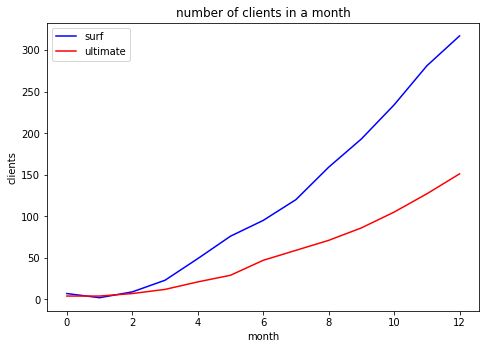

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = monthly_users.query("plan == 'surf'")["month"]
surf_users = monthly_users.query("plan == 'surf'")["user_id"]
ultimate_month = monthly_users.query("plan == 'ultimate'")["month"]
ultimate_users = monthly_users.query("plan == 'ultimate'")["user_id"]
ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')
ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel('clients')
ax.set_xlabel('month')
ax.set_title('number of clients in a month')
plt.show()

in this graph that shows the number of subscribed customers for each mobile plan, we can see without a doute the surf plan attractes alot more clinets.

At the end of the year we can see that the number of clintest thet are subscribed to surf is two times the number of clintest subscribed to ultimates

In [40]:
mean_per_month = (data.pivot_table(index = ['plan','month'], values = ["user_id", 'message_send','gb_used','call_length',	'call_made', 'monthly_revenue']))
mean_per_month.reset_index(inplace=True)

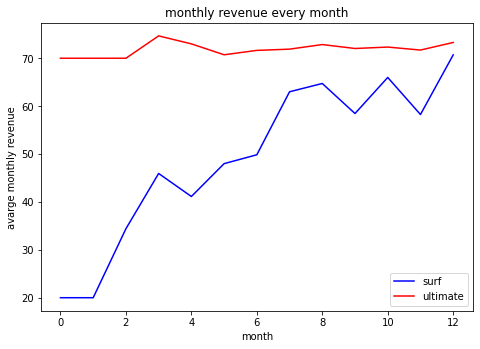

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = mean_per_month.query("plan == 'surf'")["month"]
surf_users = mean_per_month.query("plan == 'surf'")["monthly_revenue"]
ultimate_month = mean_per_month.query("plan == 'ultimate'")["month"]
ultimate_users = mean_per_month.query("plan == 'ultimate'")["monthly_revenue"]

ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')

ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel('avarge monthly revenue')
ax.set_xlabel('month')
ax.set_title('monthly revenue every month')
plt.show()

in this graph that shows the avarge monthly revenue the company gets for each phone plan, we can see that the ultimate brings more revenue in but the surf is on the rise, we should definitely analyze next year data for better conclusions.

At the end of the year we can see there is no a lot of difference in the revenue every plan brings in

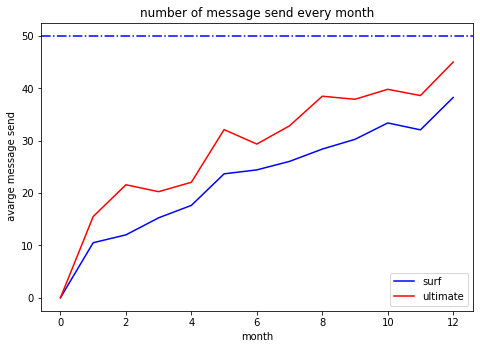

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = mean_per_month.query("plan == 'surf'")["month"]
surf_users = mean_per_month.query("plan == 'surf'")["message_send"]
ultimate_month = mean_per_month.query("plan == 'ultimate'")["month"]
ultimate_users = mean_per_month.query("plan == 'ultimate'")["message_send"]

ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')

plt.axhline(y=50, color='b', linestyle='-.', label = "surf max massages" )

ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel(' avarge message send')
ax.set_xlabel('month')
ax.set_title('number of message send every month')
plt.show()

*the blue doted line is the surf massages limite

in this graph that shows the avrage number of massages send for each phone plan, we can see that from the start that more messages were sent from users in the ultimate, note that the reference is not that great

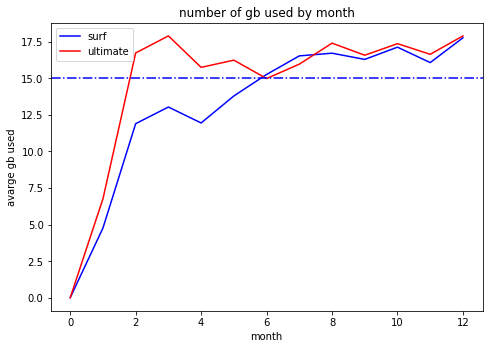

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = mean_per_month.query("plan == 'surf'")["month"]
surf_users = mean_per_month.query("plan == 'surf'")["gb_used"]
ultimate_month = mean_per_month.query("plan == 'ultimate'")["month"]
ultimate_users = mean_per_month.query("plan == 'ultimate'")["gb_used"]

ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')
plt.axhline(y=15, color='b', linestyle='-.', label = "surf max data" )

ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel('avarge gb used')
ax.set_xlabel('month')
ax.set_title('number of gb used by month')
plt.show()

*the blue doted line is the surf data limite

in this graph that shows the avrage usage of data(GB) for each phone plan, we can see that in the start users in the ultimate plan used alot more data, with a spike at 02/2018, but after about six month the usage came down to the aproxsimtly same usage.

At the end of the year we can see there is no difference in the data usage of each platform but in the surf plan the average user exceeded the data limit

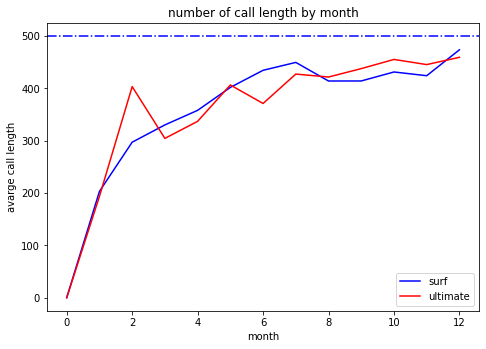

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = mean_per_month.query("plan == 'surf'")["month"]
surf_users = mean_per_month.query("plan == 'surf'")["call_length"]
ultimate_month = mean_per_month.query("plan == 'ultimate'")["month"]
ultimate_users = mean_per_month.query("plan == 'ultimate'")["call_length"]

ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')
plt.axhline(y=500, color='b', linestyle='-.', label = "surf max call length" )

ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel('avarge call length')
ax.set_xlabel('month')
ax.set_title('number of call length by month')
plt.show()

*the blue doted line is the surf call lengthe limite

in this graph that shows the avrage call length for each phone plan, we can see that in the start users in the ultimate plan used alot more data, with a huge spike at 02/2018, but after that the usage came down to the aproxsimtly same usage.

At the end of the year we can see there is no difference in the call length of each platform

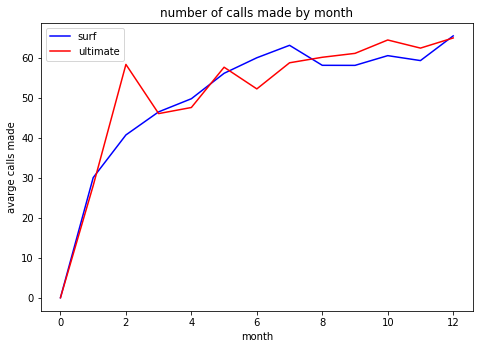

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = mean_per_month.query("plan == 'surf'")["month"]
surf_users = mean_per_month.query("plan == 'surf'")["call_made"]
ultimate_month = mean_per_month.query("plan == 'ultimate'")["month"]
ultimate_users = mean_per_month.query("plan == 'ultimate'")["call_made"]

ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')

ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel('avarge calls made')
ax.set_xlabel('month')
ax.set_title('number of calls made by month')
plt.show()

In [46]:
std_per_month = (data.pivot_table(index = ['plan','month'], values = ["user_id", 'message_send','gb_used','call_length', 'call_made', 'monthly_revenue'], aggfunc=np.std))
std_per_month.reset_index(inplace=True)

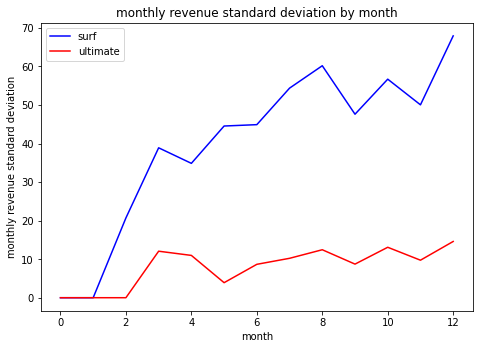

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = std_per_month.query("plan == 'surf'")["month"]
surf_users = std_per_month.query("plan == 'surf'")["monthly_revenue"]
ultimate_month = std_per_month.query("plan == 'ultimate'")["month"]
ultimate_users = std_per_month.query("plan == 'ultimate'")["monthly_revenue"]

ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')

ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel('monthly revenue standard deviation')
ax.set_xlabel('month')
ax.set_title('monthly revenue standard deviation by month')
plt.show()

in this graph we can see that the standard deviation of the surf plan is much high, higher standard deviation indicates that the monthly revenue of surf is more spread out. as the outliers can be only over paying because there is base plan price we can deduce that there are more people that over pay that are subscribed to surf plan.

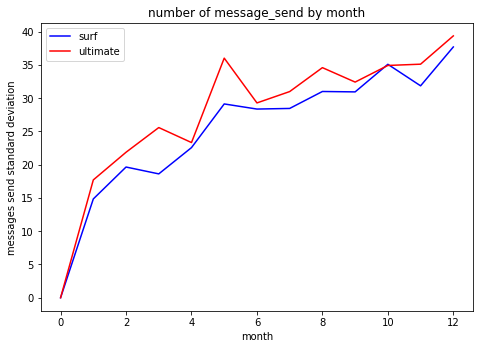

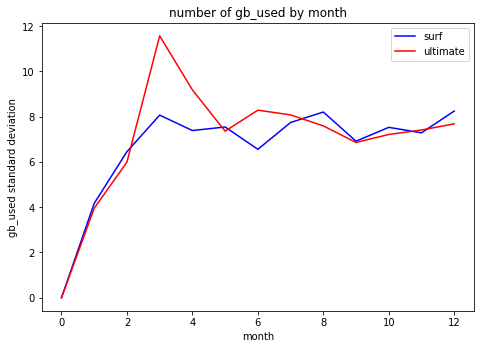

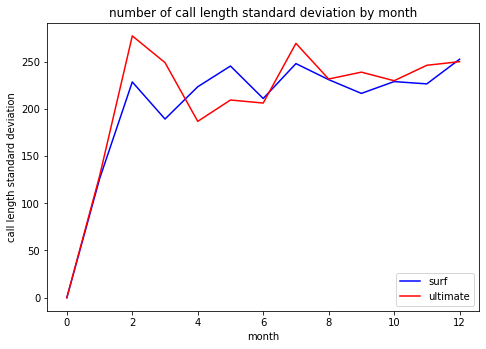

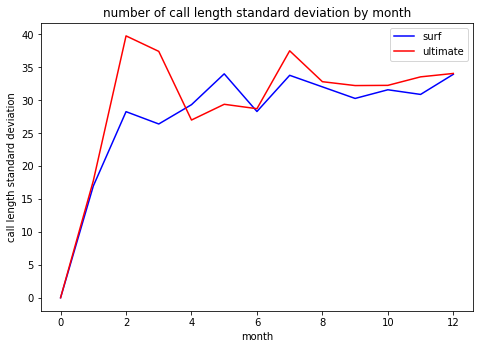

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = std_per_month.query("plan == 'surf'")["month"]
surf_users = std_per_month.query("plan == 'surf'")["message_send"]
ultimate_month = std_per_month.query("plan == 'ultimate'")["month"]
ultimate_users = std_per_month.query("plan == 'ultimate'")["message_send"]

ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')

ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel('messages send standard deviation')
ax.set_xlabel('month')
ax.set_title('number of message_send by month')
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = std_per_month.query("plan == 'surf'")["month"]
surf_users = std_per_month.query("plan == 'surf'")["gb_used"]
ultimate_month = std_per_month.query("plan == 'ultimate'")["month"]
ultimate_users = std_per_month.query("plan == 'ultimate'")["gb_used"]

ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')

ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel('gb_used standard deviation')
ax.set_xlabel('month')
ax.set_title('number of gb_used by month')
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = std_per_month.query("plan == 'surf'")["month"]
surf_users = std_per_month.query("plan == 'surf'")["call_length"]
ultimate_month = std_per_month.query("plan == 'ultimate'")["month"]
ultimate_users = std_per_month.query("plan == 'ultimate'")["call_length"]

ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')

ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel('call length standard deviation')
ax.set_xlabel('month')
ax.set_title('number of call length standard deviation by month')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
surf_month = std_per_month.query("plan == 'surf'")["month"]
surf_users = std_per_month.query("plan == 'surf'")["call_made"]
ultimate_month = std_per_month.query("plan == 'ultimate'")["month"]
ultimate_users = std_per_month.query("plan == 'ultimate'")["call_made"]

ax.plot(surf_month, surf_users, color = 'b')
ax.plot(ultimate_month,ultimate_users, color = 'r')

ax.legend(labels=['surf', 'ultimate'])
ax.set_ylabel('call length standard deviation')
ax.set_xlabel('month')
ax.set_title('number of call length standard deviation by month')
plt.show()

In [49]:
data.head(12)

,user_id,plan,month,gb_used,message_send,call_length,call_made,monthly_revenue
0,1000,ultimate,12,1.856904,11,124,16,70.00
1,1001,surf,8,6.756982,30,182,27,20.00
2,1001,surf,9,13.002754,44,315,49,20.00
3,1001,surf,10,21.807119,53,393,65,90.09
4,1001,surf,11,18.070605,36,426,64,60.00
5,1001,surf,12,18.915215,44,412,56,60.00
6,1002,surf,10,6.398447,15,59,11,20.00
7,1002,surf,11,18.891680,32,386,55,60.00
8,1002,surf,12,14.058828,41,384,47,20.00
9,1003,surf,12,26.410293,50,1104,149,158.12


In [50]:
fig = px.histogram(data, x="monthly_revenue", color="plan", hover_data=mean_per_month.columns)
fig.update_layout(
    autosize=False,
    width=800,
    height=400,)
fig.show()

as we concluded before we can see that there is more variance in the monthly revenue from surf plan and there are more outliers in that data

In [51]:
for i in ["gb_used","message_send",	"call_length", "call_made"]:
  fig = px.histogram(mean_per_month, x=i, color="plan", marginal="rug",
                    hover_data=mean_per_month.columns, title="{} a month".format(i))
  fig.update_layout(
    autosize=False,
    width=800,
    height=400,)
  fig.show()

in all the graphs above we can see tha the standard deviation of calls, massages and data is the same after about 4-6 month.

So there is no difference bettwen plans in that regard

in a month:

"gb_used" - most users use between 16-18gb

"message_send" - most call last 30-40 mints

"call_length" - most call last 400-500 mints

"call_made" - most peaople make 50-70 calls

there is no significant difference between platforms

**conclusion**:
1. There twice the number of users in the surf plan
2. The ultimate brings more revenue in but the surf is on the rise and at the end of the year we can see there is no a lot of difference in the revenue every plan brings in
3. The average messages send, data used, calss length and calls made is pretty much the same
4. The standart diviashen is much higher in the surf plan as the outliers can be only over paying because there is base plan price we can deduce that there are more people that over pay in the surf plan.
5. The standart diviashen messages send, data used, calss length and calls made is pretty much the same
6. The difference in standard deviation beetwen plans is in ravanue were surf monthly revanue is way more spread out


# **Step 4: Testing the hypotheses**


In [52]:
#create sub df of the monthly ravenue for eache platform
surf_revenue = data.query('plan =="surf"')["monthly_revenue"]
ultimate_revenue = data.query('plan =="ultimate"')["monthly_revenue"]

Test the hypotheses that the average revenue from users of Ultimate and Surf calling plans differs.

using the standard alpha 5% and the test Independent Sample T-Test. In this type of test, you are comparing the average of two independent unrelated groups. Meaning, you are comparing samples from two different populations and are testing whether or not they have a different average.

H0: the average revenue from users of Ultimate and Surf calling plans doesn't differ

H1: the average revenue from users of Ultimate and Surf calling plans differs

we use the ttest_int because its a test of average of two independent unrelated groups the users of surf revanue and users of Ultimate revanue

In [53]:
#Test the hypotheses that the average revenue from users of Ultimate and Surf calling plans differs.
results = st.ttest_ind(surf_revenue, ultimate_revenue)

print('p-value: {:.2}'.format(results.pvalue))

alpha = 0.05
if results.pvalue < alpha:
    print("We reject the null hypothesis that the average revenue from users of Ultimate and Surf calling plans doesn't differ")
else:
    print('''We can't reject the null hypothesis that the average revenue from users of Ultimate and Surf calling plans doesn't differ''')
    

p-value: 4.8e-08
We reject the null hypothesis that the average revenue from users of Ultimate and Surf calling plans doesn't differ


In [54]:
#make a db that contains the user id and the city the live in
data_users_city = data_users[["user_id", "city"]]
#make a db that contains only the mean revanue of the user that live in 'NY-NJ'
users_ny_nj = data_users_city[data_users_city['city'].str.contains('NY-NJ')]["user_id"].tolist()
users_ny_nj_mean = data[data['user_id'].isin(users_ny_nj)]["monthly_revenue"]
#make a db that contains only the mean revanue of the user that do not live in 'NY-NJ'
users_ny_nj = data_users_city[data_users_city['city'].str.contains('NY-NJ')]["user_id"].tolist()
other_users_mean = data[~data['user_id'].isin(users_ny_nj)]["monthly_revenue"]

Test the hypotheses that the average revenue from users in NY-NJ area is different from that of the users from other regions.

using the standard alpha 5% and the test Independent Sample T-Test. In this type of test, you are comparing the average of two independent unrelated groups. Meaning, you are comparing samples from two different populations and are testing whether or not they have a different average.

H0:  the average revenue from users in NY-NJ area isn't different from that of the users from other regions

H1: the average revenue from users in NY-NJ area is different from that of the users from other regions

In [55]:
#Test the hypotheses that the average revenue from users in NY-NJ area is different from that of the users from other regions.
results = st.ttest_ind(users_ny_nj_mean, other_users_mean)

print('p-value: {:.2}'.format(results.pvalue))

alpha = 0.05
if results.pvalue < alpha:
    print("We reject the null hypothesis that the average revenue from users in NY-NJ area is different from that of the users from other regions")
else:
    print("We can't reject the null hypothesis that the average revenue from users in NY-NJ area is different from that of the users from other regions")

p-value: 0.037
We reject the null hypothesis that the average revenue from users in NY-NJ area is different from that of the users from other regions


in conclusion we didn't find that the average revenue from users of Ultimate and Surf calling plans differs

and didnt find that the average revenue from users in NY-NJ area is different from that of the users from other regions 

# **Step 5 : overall conclusion**


in this project wecarry out a preliminary analysis of the plans based on a relatively small client selection. wehad data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job was to analyze clients' behavior and determine which prepaid plan brings in more revenue.

first of all the are twice the number of users in the surf plan and users on the surf exceed more the phone plan, as a consequences surf pay more even if the plan cost half of the Ultimate plan. other parameters such as call length, massages and data is almost the same. we checked if there is correlation between the plans and the revenue and found they do not differ

also we found aoute thete there is no diffrence in revenue in conecshen to the city the user is from

do to the information we discovered i would recomend the following to to maximize profits:

1. because surf users exceed the plan alot(we have learned it from the distribution graph and monthly usage of data graph) make your money from that exceeding, make them pay more for it. if a  surf plan user exceeds the data usage by 5 GB they pay as much as the ultimate user and we can see (from the number of gb used by month graph) the that on avrage they exceed by 3 GB so we soulde convince them to purchese the ultimate plan and it will make more money  

2. because the usage of calls,massages and data usage is the same from both plans if there were more people in the ultimate plan we would make more money 


i believe this can increase the company's revenue


